In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
all_reviews = []
all_reviewers = []

In [3]:
for i in range(14):      # Number of pages plus one 
    url = "https://www.rottentomatoes.com/m/ghostbusters_2016/reviews/?page={}&sort=".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"html.parser")
    page_reviews = soup.find_all("div", class_="review_icon")
    page_reviewers = soup.find_all("div", class_="critic_name")
    all_reviews = all_reviews + page_reviews
    all_reviewers = all_reviewers + page_reviewers

Converting ratings to 'fresh' or 'rotten'

In [4]:
ratings = [str(x) for x in all_reviews]
ratings = [x[35:41] for x in ratings]
ratings = [x.replace('"','') for x in ratings]

Cleaning up critics' names

In [5]:
reviewer_names = [y.a.contents for y in all_reviewers]

In [6]:
reviewers = [item for sublist in reviewer_names for item in sublist]

In [7]:
pub_names = [z.em.contents for z in all_reviewers]
publications = [item for sublist in pub_names for item in sublist]

In [1]:
import pandas as pd

In [9]:
data = { 'reviewer': reviewers,
        'publication': publications,
        'rating':ratings
       }

In [10]:
df = pd.DataFrame(data)

In [11]:
df

,publication,rating,reviewer
0,SSG Syndicate,rotten,Susan Granger
1,Scotsman,fresh,Alistair Harkness
2,London Evening Standard,fresh,David Sexton
3,Aisle Seat,fresh,Mike McGranaghan
4,Daily Express (UK),fresh,Henry Fitzherbert
5,Daily Express (UK),fresh,Allan Hunter
6,Observer (UK),fresh,Mark Kermode
7,Kaplan vs. Kaplan,rotten,David Kaplan
8,Matt's Movie Reviews,rotten,Matthew Pejkovic
9,Ozus' World Movie Reviews,rotten,Dennis Schwartz


Determining gender

In [12]:
first_names = [a.split() for a in df.reviewer]
first_names = [a[0] for a in first_names]

In [13]:
from genderize import Genderize
import time

In [14]:
genders = []
for x in first_names:
    gender = Genderize().get([x])
    print(gender)
    time.sleep(5)
    genders = genders + gender

[{'probability': 1.0, 'gender': 'female', 'count': 3203, 'name': 'Susan'}]
[{'probability': 1.0, 'gender': 'male', 'count': 98, 'name': 'Alistair'}]
[{'probability': 1.0, 'gender': 'male', 'count': 12597, 'name': 'David'}]
[{'probability': 1.0, 'gender': 'male', 'count': 5595, 'name': 'Mike'}]
[{'probability': 1.0, 'gender': 'male', 'count': 1067, 'name': 'Henry'}]
[{'probability': 1.0, 'gender': 'male', 'count': 590, 'name': 'Allan'}]
[{'probability': 1.0, 'gender': 'male', 'count': 6178, 'name': 'Mark'}]
[{'probability': 1.0, 'gender': 'male', 'count': 12597, 'name': 'David'}]
[{'probability': 1.0, 'gender': 'male', 'count': 3338, 'name': 'Matthew'}]
[{'probability': 0.99, 'gender': 'male', 'count': 1279, 'name': 'Dennis'}]
[{'probability': 0.99, 'gender': 'male', 'count': 2949, 'name': 'Tim'}]
[{'probability': 1.0, 'gender': 'male', 'count': 4915, 'name': 'Matt'}]
[{'probability': 0.79, 'gender': 'female', 'count': 5812, 'name': 'Andrea'}]
[{'probability': 1.0, 'gender': 'male', 'co

In [15]:
all_genders = [g['gender'] for g in genders]

In [16]:
prob = []
for p in genders:
    print(p)
    # if the key exists
    if 'probability' in p:
        prob = prob + [p['probability']]
    # else give it a prob of 0
    else: prob = prob + [0]

{'probability': 1.0, 'gender': 'female', 'count': 3203, 'name': 'Susan'}
{'probability': 1.0, 'gender': 'male', 'count': 98, 'name': 'Alistair'}
{'probability': 1.0, 'gender': 'male', 'count': 12597, 'name': 'David'}
{'probability': 1.0, 'gender': 'male', 'count': 5595, 'name': 'Mike'}
{'probability': 1.0, 'gender': 'male', 'count': 1067, 'name': 'Henry'}
{'probability': 1.0, 'gender': 'male', 'count': 590, 'name': 'Allan'}
{'probability': 1.0, 'gender': 'male', 'count': 6178, 'name': 'Mark'}
{'probability': 1.0, 'gender': 'male', 'count': 12597, 'name': 'David'}
{'probability': 1.0, 'gender': 'male', 'count': 3338, 'name': 'Matthew'}
{'probability': 0.99, 'gender': 'male', 'count': 1279, 'name': 'Dennis'}
{'probability': 0.99, 'gender': 'male', 'count': 2949, 'name': 'Tim'}
{'probability': 1.0, 'gender': 'male', 'count': 4915, 'name': 'Matt'}
{'probability': 0.79, 'gender': 'female', 'count': 5812, 'name': 'Andrea'}
{'probability': 1.0, 'gender': 'male', 'count': 2270, 'name': 'Diego'

In [17]:
print(prob)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 0.79, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 1.0, 0.95, 0.99, 0.88, 1.0, 0.99, 0.95, 1.0, 1.0, 1.0, 0.98, 1.0, 0.99, 1.0, 1.0, 0.99, 1.0, 1.0, 0.98, 1.0, 0.97, 1.0, 0.95, 0.53, 0, 1.0, 1.0, 0.92, 1.0, 0.98, 1.0, 1.0, 1.0, 0.99, 1.0, 0.93, 1.0, 1.0, 0.99, 1.0, 0.99, 0.63, 1.0, 1.0, 0.9, 1.0, 0.99, 0.99, 0.99, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.61, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.77, 0.93, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 0.55, 1.0, 1.0, 1.0, 0.96, 0.85, 0.99, 1.0, 0.87, 1.0, 0.71, 1.0, 1.0, 0.99, 1.0, 0.96, 1.0, 1.0, 1.0, 0.99, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 0.93, 0.99, 0.99, 0, 1.0, 0.94, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 0.96, 1.0, 0.93, 0.99, 0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 0.87, 1.0, 0.99, 1.0, 0,

In [18]:
df['gender'] = all_genders

In [19]:
df['probability'] = prob

In [20]:
df.to_csv('data/final_critics.csv', sep="\t",encoding='utf-8')

In [1]:
# commented out unless you start script from here 
# so there's no need to rerun everything above

# import pandas as pd
# df = pd.read_csv('data/final_critics.csv',sep="\t",encoding='utf-8')

Remove probability under 95%

In [2]:
df
df = df.loc[df.probability >= .95]

Determining statistical significance with crosstab and chi^2

In [3]:
ratings_gender = pd.crosstab(df.rating,df.gender)
print(ratings_gender)

gender  female  male
rating              
fresh       38   107
rotten       9    47


In [11]:
import scipy.stats as stat
ratings_gender_chi = stat.chi2_contingency(ratings_gender)
print("Chi value: " + str(ratings_gender_chi[0]) + "\tp value: " + str(ratings_gender_chi[1]))

Chi value: 1.78524223294	p value: 0.181506925773


Code for table and graph for blog post

In [33]:
ratings_gender_margin = pd.crosstab(df.rating,df.gender, margins=True)
ratings_gender_margin.to_html()

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>gender</th>\n      <th>female</th>\n      <th>male</th>\n      <th>All</th>\n    </tr>\n    <tr>\n      <th>rating</th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>fresh</th>\n      <td>38</td>\n      <td>107</td>\n      <td>145</td>\n    </tr>\n    <tr>\n      <th>rotten</th>\n      <td>9</td>\n      <td>47</td>\n      <td>56</td>\n    </tr>\n    <tr>\n      <th>All</th>\n      <td>47</td>\n      <td>154</td>\n      <td>201</td>\n    </tr>\n  </tbody>\n</table>'

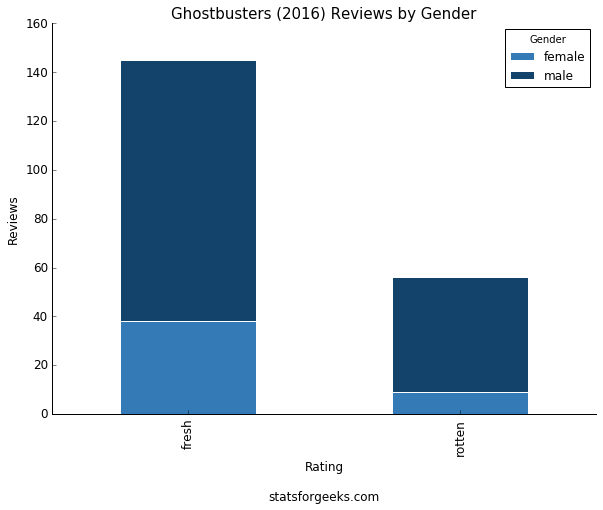

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = ratings_gender.plot(kind='bar', figsize=(9.75,7) , stacked=True, color=['#337ab7','#13426A'], edgecolor="#FFFFFF", grid=False, title="Ghostbusters (2016) Reviews by Gender")
ax.set_xlabel('Rating\n\nstatsforgeeks.com')
ax.set_ylabel('Reviews')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(title="Gender")
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
ax.title.set_fontsize(15)

In [54]:
145/201

0